## Ejercicio 1: Recopilación de datos. (1p)

Se deben recopilar más de 5000 tweets en inglés que puedan tener un sentimiento positivo, 
negativo o neutro. Procurar mantener en la medida de lo posible una proporción equilibrada. Para la
recopilación de los datos se puede hacer de forma manual (no recomendable) o usar un dataset de 
tweets de la base de datos Kaggle (OJO! Que el texto no esté ya pre-procesado). Los tweets 
recopilados se deben almacenar en un archivo CSV que se debe leer con pandas. Muestra en el 
notebook las primeras 5 filas de la tabla leída.

In [1]:
#Se cargan todas las librerías que vamos a usar

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
from nltk.stem import SnowballStemmer
from textblob import TextBlob


In [2]:
tweets = pd.read_csv('Tweets.csv')
tweets=tweets["text"]
tweets.head(5)


0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [3]:
tweets.head(15)

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you've added commercials t...
2     @VirginAmerica I didn't today... Must mean I n...
3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
6     @VirginAmerica yes, nearly every time I fly VX...
7     @VirginAmerica Really missed a prime opportuni...
8       @virginamerica Well, I didn't…but NOW I DO! :-D
9     @VirginAmerica it was amazing, and arrived an ...
10    @VirginAmerica did you know that suicide is th...
11    @VirginAmerica I &lt;3 pretty graphics. so muc...
12    @VirginAmerica This is such a great deal! Alre...
13    @VirginAmerica @virginmedia I'm flying your #f...
14                               @VirginAmerica Thanks!
Name: text, dtype: object

In [ ]:
# Para el ejercicio debemos quedarnos con la columna "text".


## Ejercicio 2: Limpieza del texto, eliminar las palabras que no aportan información. (2p)

Crear una función limpiar_texto que toma un dataset como entrada y realiza una serie de 
pasos de preprocesamiento para limpiar y estructurar el texto de manera que sea más adecuado para 
tareas de procesamiento de lenguaje natural (NLP). 
Para cada línea de texto del data set, la función debe:
* Eliminar menciones, hashtags y URLs del texto. Pista: la función re.sub() puede ser útil.
* Convertir el texto en minúscula.
* Separa las palabras dentro del tweet como elementos de una lista. A este proceso se le llama tokenización, investiga cómo hacerlo con la función TweetTokenizer() incluida en NLTK.
* Para cada una de las palabras en esa lista generada:
    * Eliminar las palabras comunes y poco informativas (conocidas como stop words). Usa la recopilación de stop words que ya existe en NLTK (accede a ellas con stopwords.words() seleccionando inglés como idioma).
    * Utilizar técnicas de lematización (stemming). Investiga qué son y usa el modelo SnowballStemmer() que ya incluye NLTK para stemming.
* Transformar la lista final en una cadena de caracteres de nuevo. Cada palabra debe estar separada por un espacio y ese texto debe sustituir al original en la tabla del dataset.

In [4]:
def limpiar_texto(dataset):
    for n in range(0,len(dataset)-1):
        texto_limpio = re.sub(r"@\w+|#\w+|https?://\S+|www\.\S+|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+","",dataset[n])
        texto_minusculas = texto_limpio.lower()
        tokenizer = TweetTokenizer()
        texto_separado = tokenizer.tokenize(texto_minusculas)
        
        stop_words = set(stopwords.words('english'))
        texto_filtrado = []
        for palabra in texto_separado:
            if palabra not in stop_words:
                texto_filtrado.append(palabra)
            
            lematizacion = SnowballStemmer("english")
            lexemas = [lematizacion.stem(palabra) for palabra in texto_filtrado]
        
        texto_final = " ".join(lexemas)
        dataset[n]=texto_final
    
    return dataset
                
            

In [5]:
limpiar_texto(tweets)

0                                                   said .
1                      plus ad commerci experi ... tacki .
2               today ... must mean need take anoth trip !
3        realli aggress blast obnoxi " entertain " gues...
4                                     realli big bad thing
                               ...                        
14635                    thank got differ flight chicago .
14636    leav 20 minut late flight . warn communic 15 m...
14637                          pleas bring american airlin
14638    money , chang flight , answer phone ! suggest ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

## Ejercicio3: Etiquetado de datos con herramientas ya existentes. (2p)
El objetivo principal de esta función es asignar la categoría de sentimiento correspondiente usando modelos existentes como TextBlob. TextBlob asigna una puntuación de polaridad al texto, donde valores positivos indican sentimientos positivos y valores negativos indican sentimientos negativos. La intención del proyecto es usar los modelos ya existentes para crear el dataset de entrenamiento necesario para entrenar nuestro propio modelo e intentar que funcione mejor que los ya existentes. Define una función llamada clasificador que toma el dataset con el texto procesado y limpio como entrada. El resultado de este proceso debe almacenarse en un archivo CSV con dos columnas: una para la frase o texto y otra para la etiqueta correspondiente.
* Para cada línea de texto del data set, la función debe:
    * Utilizar el modelo TextBlob para realizar un análisis de sentimiento. Investiga cómo hacerlo.
    * En función de la polaridad calculada, clasificar el sentimiento en categorías específicas. Las categorías deben incluir "Contento", "Muy feliz", "Neutro", "Molesto" y "Hater".
* Finalmente, guardar los resultados como una columna nueva en el dataset.

In [6]:
def clasificador(data):
    categorias = []
    for fila in data:
        blob = TextBlob(fila)
        polaridad = blob.sentiment.polarity
        if polaridad == 0:
            categoria = "Neutro"
        elif polaridad > 0 and polaridad < 0.5:
            categoria = "Contento"
        elif polaridad >= 0.5:
            categoria = "Muy feliz"
        elif polaridad < 0 and polaridad > -0.5:
            categoria = "Molesto"
        elif polaridad <= -0.5:
            categoria = "Hater"
        
        categorias.append(categoria)
    #print(categorias)
    data_frame = pd.DataFrame(data)
    data_frame["Categoria"] = categorias
    
    return data_frame
    
        
        

In [7]:
tweets = clasificador(tweets)

In [8]:
tweets.head(5)

,text,Categoria
0,said .,Neutro
1,plus ad commerci experi ... tacki .,Neutro
2,today ... must mean need take anoth trip !,Molesto
3,"realli aggress blast obnoxi "" entertain "" gues...",Neutro
4,realli big bad thing,Molesto


## Ejercicio4: Codificación de los atributos y objetivos. (1p)
Investiga cómo funciona CountVectorizer () e investiga si existe otro codificador que se ajuste mejor a tu tarea. Una vez codificado, separa el conjunto de entrenamiento del conjunto de prueba.

In [16]:
atributos = tweets["text"]
objetivo = tweets["Categoria"]

vectorizer = CountVectorizer()
atributos_codificados = vectorizer.fit_transform(atributos)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
objetivo_codificado = label_encoder.fit_transform(objetivo)

In [18]:
#Separa conjunto de entrenamiento y de prueba
(atributos_entrenamiento, atributos_prueba, objetivo_entrenamiento, objetivo_prueba) = train_test_split(atributos_codificados, objetivo_codificado, random_state=12345, test_size=0.2, stratify=objetivo_codificado)

## Ejercicio5: Entrenamiento del modelo. (2p)
Entrena un modelo Naive Bayes y otro de tu elección. Investiga sobre qué versiones de cada modelo es más adecuada para la tarea a realizar. Calcula el porcentaje de acierto del modelo entrenado. Si el porcentaje de acierto está por debajo del 70%, vuelve atrás e intenta mejorar este resultado.

In [19]:
#Modelo Naive Bayes
naive_bayes = MultinomialNB(alpha=1.0)  #alpha es el parámetro de suavizado
naive_bayes.fit(atributos_entrenamiento, objetivo_entrenamiento)

#Realiza las predicciones con el conjunto de prueba
predicciones_nb = naive_bayes.predict(atributos_prueba)
#Calcular la precisión del modelo
precision_nb = naive_bayes.score(atributos_prueba, objetivo_prueba)
print("La precisión del modelo Naive Bayes desarrollado es:", precision_nb*100, "%")

La precisión del modelo Naive Bayes desarrollado es: 79.40573770491804 %


In [20]:
#Modelo de mi elección: con toda probabilidad el modelo de regresión logística -> 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

regresion_logistica = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
regresion_logistica.fit(atributos_entrenamiento, objetivo_entrenamiento)

#Realiza las predicciones con el conjunto de prueba
predicciones_relog = regresion_logistica.predict(atributos_prueba)
#Calcular la precisión del modelo
precision_relog = regresion_logistica.score(atributos_prueba, objetivo_prueba)
print("La precisión del modelo de regresión logística desarrollado es:", precision_relog*100, "%")

La precisión del modelo de regresión logística desarrollado es: 88.7636612021858 %


## Ejercicio6: Usar el modelo entrenado (2p)
Se deben recopilar los últimos 30 tweets de dos personas con influencia en redes sociales de forma manual, alguna conocida por su mala fama como “hater” y otra con una valoración social más positiva. Utilizar el modelo desarrollado para predecir el sentimiento de cada tweet. Los resultados para cada persona deben ser ilustrados en un pie chart (diagrama de sectores) que muestre el estado de ánimo (el porcentaje de tweets clasificados con cada etiqueta).

#### 1. Persona de estilo más negativo
Para esta tarea, he navegado por X (Twitter) y he dado con una escritora-activista australiana llamada Alexandra Marshall (@ellymelly) cuyos tweets son la mayoría opiniones negativas o contra un tema concreto. He recopilado 30 de sus últimos tweets (obviando alguno que sólo contenía emoticonos) en un archivo CSV de nombre "Tweets_hater_examen", y he aplicado el modelo de detección de sentimientos generado sobre ellos. He aquí el resultado:

In [47]:
hater = pd.read_csv('my_tweets.csv', delimiter=";")
hater = hater["message to examine"]
hater= hater[:30]
hater.head(5)

0             Smart money always makes the same moves.
1    A thread of tweets that show why they really p...
2    Death penalty for all knife crime offences in ...
3    I would never, ever, ever, get down on one kne...
4    Lazy people do a little work and feel like the...
Name: message to examine, dtype: object

In [48]:
limpiar_texto(hater)

0                         smart money alway make move .
1     thread tweet show realli put jail . spoiler al...
2     death penalti knife crime offenc uk . enough e...
3     would never , ever , ever , get one knee woman...
4     lazi peopl littl work feel like win . winner w...
5     they'r go forc carbon credit system us . secre...
6     pain head . pain heart . pain torso . pain mi ...
7     turn 50m sell soul . shut certain subject sell...
8     broke , unconnect weak bother deep insid . dee...
9     real gs know nsync made banger . bye bye byeeeeee
10    life actual simpl . becom strong rich possibl ...
11                           life get better get better
12    2024 chaotic . hard . also full opportun . run...
13    man hate drive bitch . afraid “ stress ” traff...
14    " better version alreadi walk planet . love li...
15                     cant explain much want sex hoe .
16    differ conspiraci theori realiti usual around ...
17    refus wear suit twice entireti matrix atta

In [49]:
hater = clasificador(hater)
hater

,message to examine,Categoria
0,smart money alway make move .,Contento
1,thread tweet show realli put jail . spoiler al...,Molesto
2,death penalti knife crime offenc uk . enough e...,Neutro
3,"would never , ever , ever , get one knee woman...",Neutro
4,lazi peopl littl work feel like win . winner w...,Contento
5,they'r go forc carbon credit system us . secre...,Contento
6,pain head . pain heart . pain torso . pain mi ...,Neutro
7,turn 50m sell soul . shut certain subject sell...,Molesto
8,"broke , unconnect weak bother deep insid . dee...",Molesto
9,real gs know nsync made banger . bye bye byeeeeee,Contento


In [50]:
sentimientos_hater = hater["Categoria"].value_counts()
sentimientos_hater

Categoria
Contento     12
Molesto       9
Neutro        6
Muy feliz     2
Hater         1
Name: count, dtype: int64

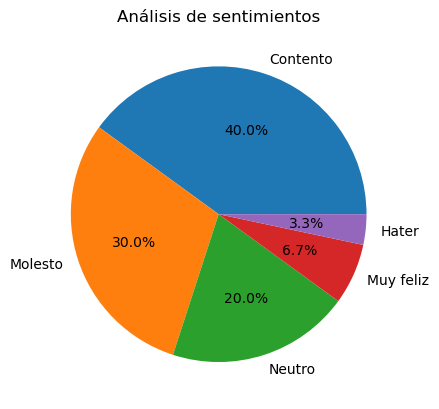

In [51]:
import matplotlib.pyplot as plt

plt.pie(sentimientos_hater, labels=sentimientos_hater.index, autopct="%1.1f%%")
plt.title("Análisis de sentimientos")
plt.show()

#### 1. Persona normal

In [33]:
normal = pd.read_csv('Tweets_normal_examen.csv', delimiter=";")
normal = normal["Texto"]
normal

0     I often live too far in the future. Wondering ...
1     I’m working out to my tennis pre match playlis...
2     Thank you for holding the door open for me…. B...
3     Today is hair day! I’m braids. I get so excite...
4             Dall-e got tired of me asking for images.
5                   Butterfingers are so under rated. 🍫
6     Starting to collect match-worn jerseys. thanks...
7                                 Back to work we go ….
8                                This makes me so happy
9     I am not ok today. And that’s ok to not be ok....
10    Orange slices (you know the candy) are my kryp...
11    You ever get so tired your brain stops working...
12    Having 2 kids is def not easy. How do you moms...
13    Have you ever wanted to start your work out bu...
14    It’s unhealthy on how excited I am for the new...
15    I’m not used to working out with no goal or to...
16                                8 is a better number.
17     My new fragrance is “old spoiled milk”. #

In [34]:
limpiar_texto(normal)

0     often live far futur . wonder feel tomorrow 10...
1     ’ work tenni pre match playlist … aiiiii get p...
2     thank hold door open … . ’ footbal field away ...
3     today hair day ! ’ braid . get excit hair day ...
4                             dall- got tire ask imag .
5                                     butterfing rate .
6     start collect match-worn jersey . thank ’ say ...
7                                      back work go … .
8                                            make happi
9     ok today . ’ ok ok . one ok everi singl day . ...
10               orang slice ( know candi ) kryptonit .
11    ever get tire brain stop work ’ think basic th...
12    2 kid def easi . mom / dad well ! ! ! ? ? ? es...
13    ever want start work sudden rememb list … . do...
14    ’ unhealthi excit new * nsync music troll movi...
15    ’ use work goal honest - championship mind . s...
16                                    8 better number .
17                    new fragranc “ old spoil m

In [35]:
normal = clasificador(normal)
normal

,Texto,Categoria
0,often live far futur . wonder feel tomorrow 10...,Contento
1,’ work tenni pre match playlist … aiiiii get p...,Contento
2,thank hold door open … . ’ footbal field away ...,Neutro
3,today hair day ! ’ braid . get excit hair day ...,Muy feliz
4,dall- got tire ask imag .,Neutro
5,butterfing rate .,Neutro
6,start collect match-worn jersey . thank ’ say ...,Contento
7,back work go … .,Neutro
8,make happi,Neutro
9,ok today . ’ ok ok . one ok everi singl day . ...,Muy feliz


In [36]:
sentimientos_normal = normal["Categoria"].value_counts()
sentimientos_normal

Categoria
Contento     14
Neutro        9
Muy feliz     5
Hater         1
Molesto       1
Name: count, dtype: int64

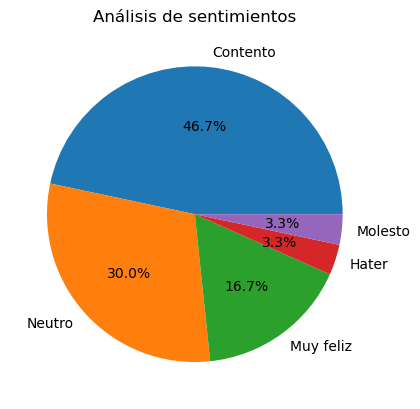

In [38]:
plt.pie(sentimientos_normal, labels=sentimientos_normal.index, autopct="%1.1f%%")
plt.title("Análisis de sentimientos")
plt.show()